In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr
from sklearn.impute import SimpleImputer


import env
from wrangle import wrangled_zillow

In [2]:
train, validate, test = wrangled_zillow()
train.head()

Using cached csv


,bedrooms,bathrooms,area,tax_value,year_built,county,tax_amount,transaction_date
14961,3.0,2.5,1913.0,830000.0,1985,OC,8973.00,2017-03-31
33917,4.0,2.0,2171.0,74179.0,1956,OC,1085.74,2017-06-23
29530,3.0,2.0,1880.0,577546.0,1940,LA,6824.84,2017-06-06
37330,2.0,1.0,1548.0,386000.0,1947,LA,5398.68,2017-07-07
26232,4.0,3.0,2034.0,667000.0,2005,VC,7520.44,2017-05-23


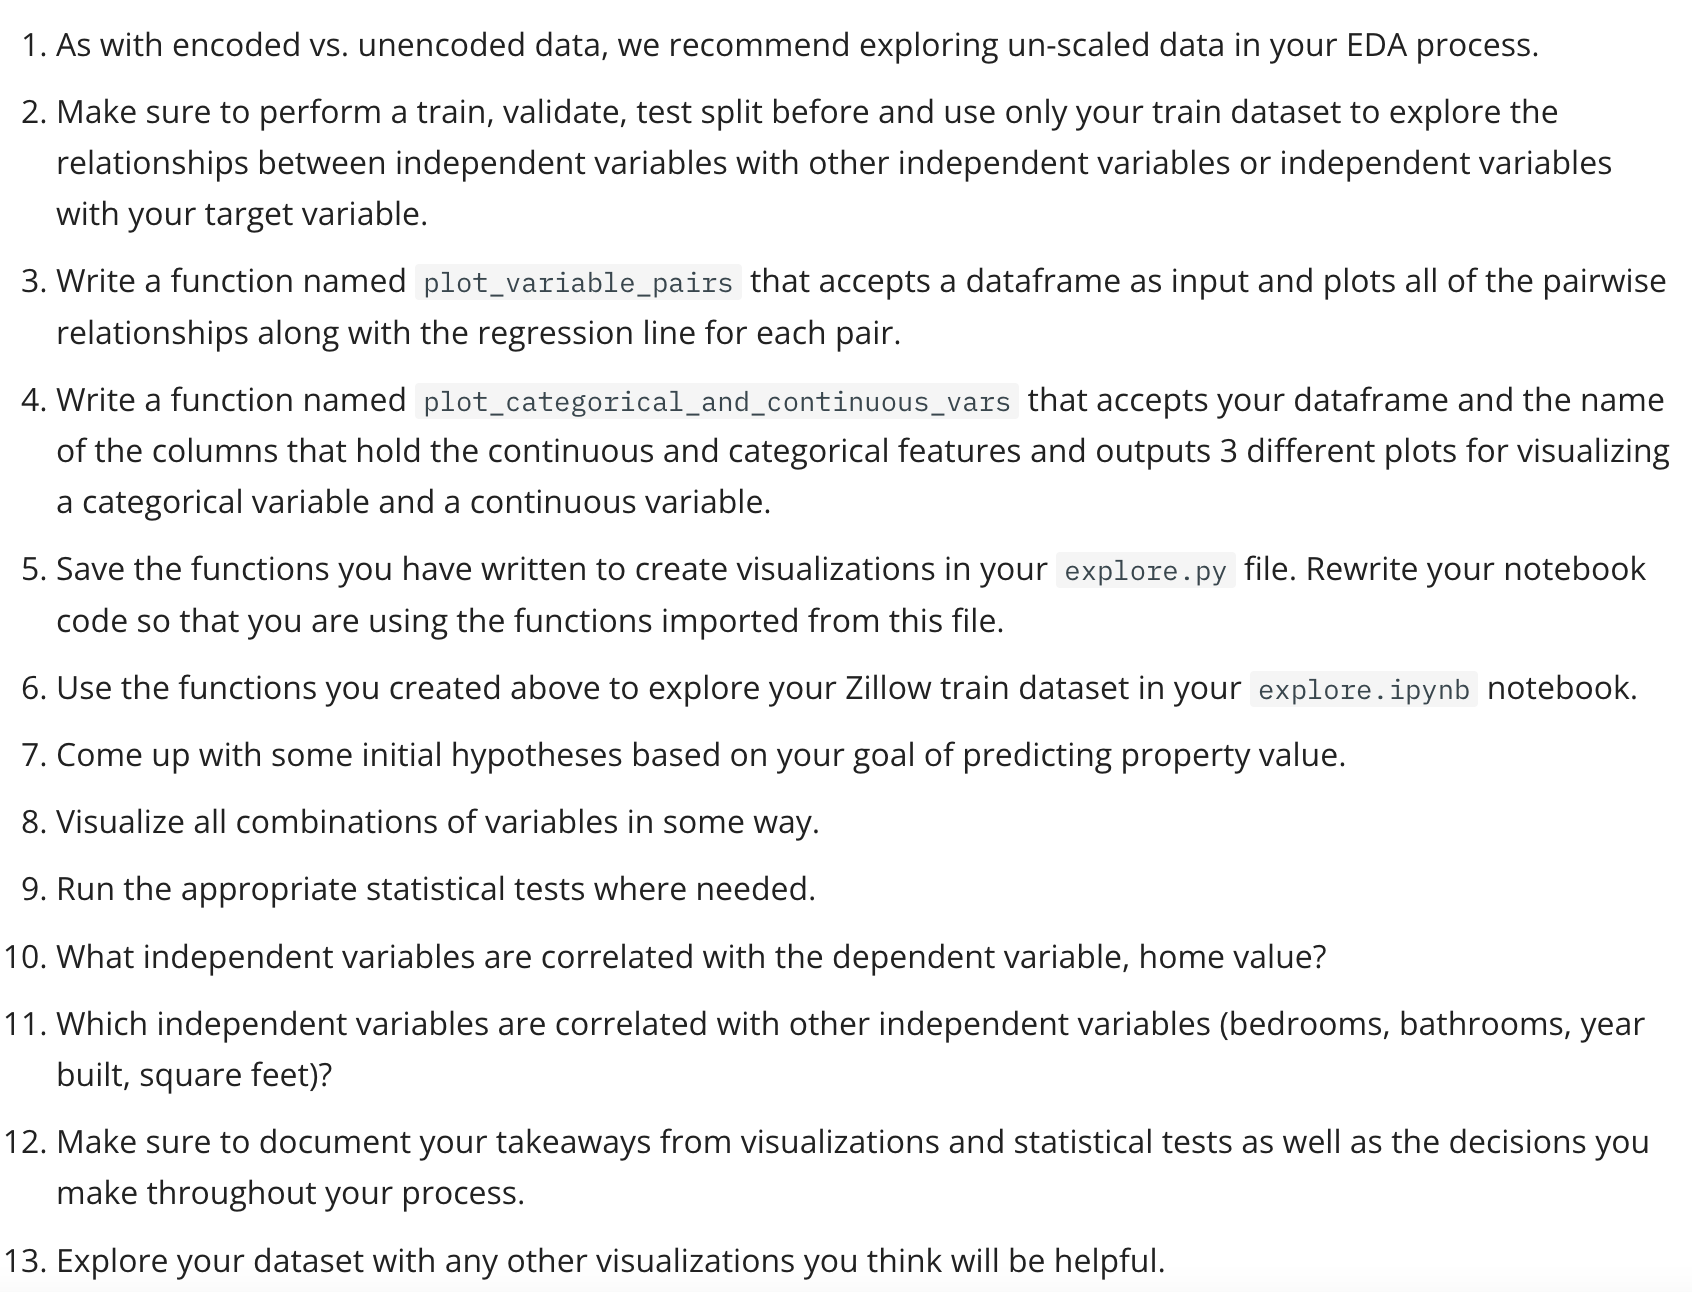

In [3]:
from IPython.display import Image
from IPython.display import HTML
#since its local, use path
PATH = "/Users/juleszara/codeup-data-science/regression-excercises/"
Image(filename = PATH + "zillow_explore_exercises.png") 

## Univariate Distributions

#### Continuous Variable Distribution

- df.[col].hist(grid=False, bins=10)
- sns.displot(x, data)
- sns.boxplot(data)

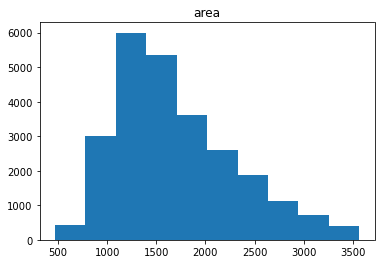

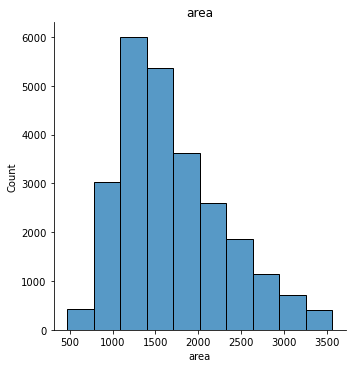

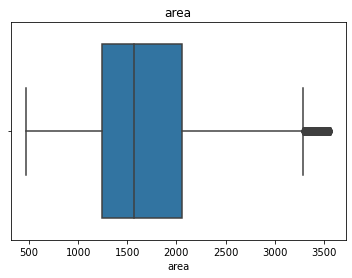

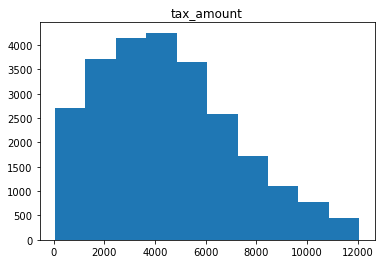

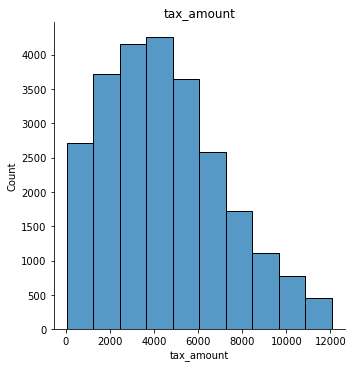

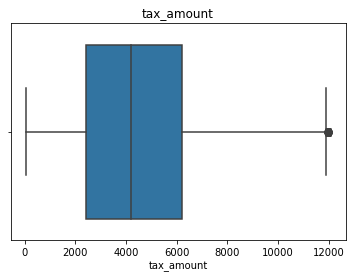

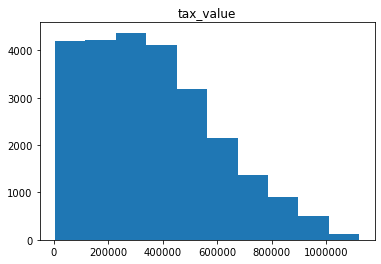

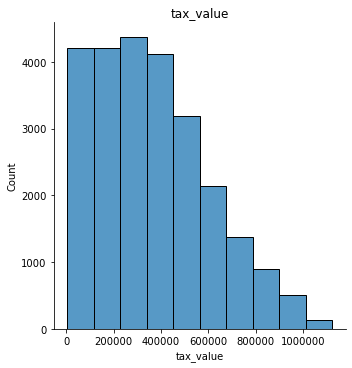

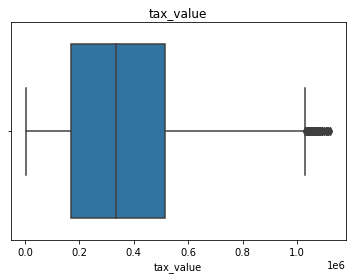

In [4]:
#plot continuous variables
num_cols = ['area', 'tax_amount', 'tax_value']

for col in num_cols:
    plt.hist(train[col])
    plt.ticklabel_format(useOffset = False, style = 'plain') #remove scientific notation
    plt.title(col)
    plt.show()
    sns.displot(x = train[col], data = train, bins = 10)
    plt.ticklabel_format(useOffset = False, style = 'plain')
    plt.title(col)
    plt.show()
    sns.boxplot(x = train[col])
    plt.title(col)
    plt.show()

#### Discrete Variable Distributions
- sns.countplot(x='discrete_var', data)

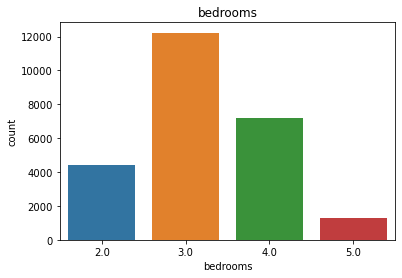

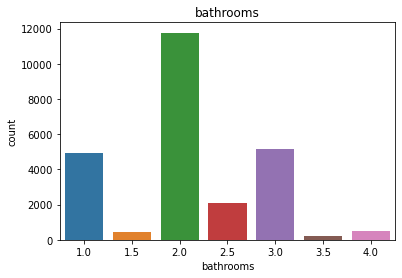

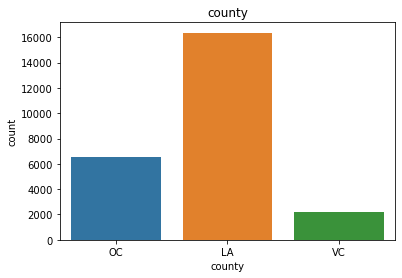

In [33]:
#plot discrete variable distributions
cat_cols = ['bedrooms', 'bathrooms', 'county']

for col in cat_cols:
    sns.countplot(train[col])
    plt.title(col)
    plt.show()

## Continuous w/ continuous
- sns.pairplot(data)
- sns.relplot(x, y, data, kind=scatter)
- sns.lmplot(x, y, data, scatter=True, hue=None, col=None)
- sns.jointplot(x, y, data, kind=scatter)
- sns.heatmap(train.corr())

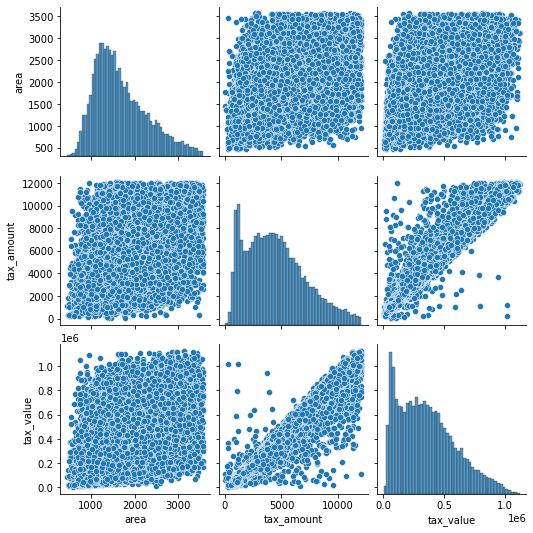

In [6]:
sns.pairplot(train[num_cols])

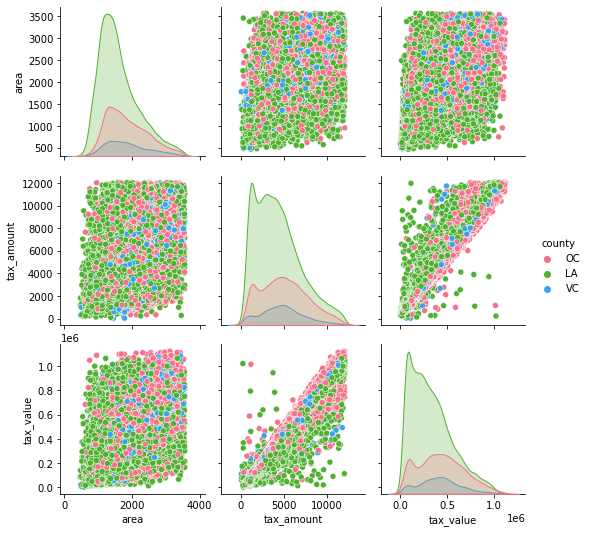

In [15]:
# with subset data, add the categorical column into df
sns.pairplot(train[['area', 'tax_amount', 'tax_value', 'county']] , hue = 'county', palette = 'husl')

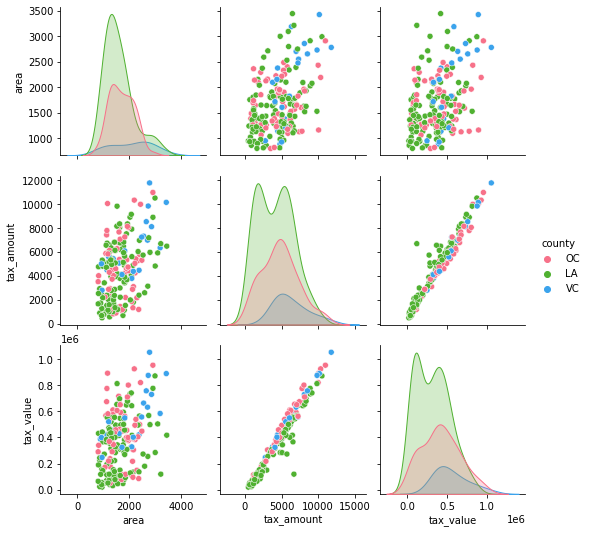

In [18]:
# with subset data, add the categorical column into df, sample used for better visualizations
sns.pairplot(train[['area', 'tax_amount', 'tax_value', 'county']].sample(200) , hue = 'county', palette = 'husl')

## Discrete w/ Continuous
- sns.swarmplot(x='discrete_var', y='continuous_var', data=train)
- sns.stripplot(x='discrete_var', y='continuous_var', data=train)
- sns.boxplot(x='discrete_var', y='continuous_var', data=train)
- sns.violinplot(x='discrete_var', y='continuous_var', data=train)
- sns.barplot(x='discrete_var', y='continuous_var', data=train)

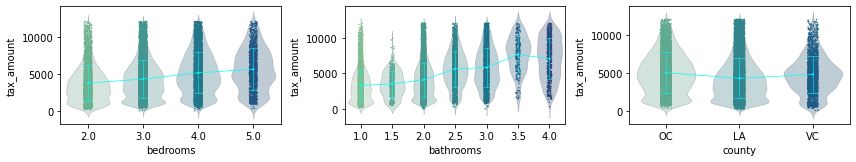

In [36]:
fig, ax = plt.subplots(6,3, figsize = (12, 13))

for indx, (column, axes) in list(enumerate(list(zip(cat_cols,ax.flatten())))):
    sns.violinplot(ax = axes, x = train[column],
                  y = train['tax_amount'],
                  scale = 'width', 
                   linewidth = 0.5,
                  palette = 'crest', 
                   inner = None)
    
    plt.setp(axes.collections, alpha = 0.3)
    
    sns.stripplot(ax = axes, x = train[column],
                 y = train['tax_amount'],
                 palette = 'crest', alpha = 0.9,
                 s = 1.5, jitter = 0.07)
    sns.pointplot(ax = axes, x = train[column],
                 y = train['tax_amount'],
                 color = 'cyan', scale = 0.25,
                 estimator = np.mean, ci = 'sd',
                 errwidth = 0.5, capsize = 0.15, join = True)
    
    plt.setp(axes.lines, zorder = 100)
    plt.setp(axes.collections, zorder = 100)
    
else:
    [axes.set_visible(False) for axes in ax.flatten()[indx + 1:]]
    
plt.tight_layout()
plt.show()

In [ ]:
def plot_variable_pairs():

In [ ]:
def plot_categorical_and_continuous_vars(df, 
                                        categorical_cols = [''])

In [40]:
train.bedrooms.value_counts()

3.0    12224
4.0     7204
2.0     4432
5.0     1274
Name: bedrooms, dtype: int64

In [ ]:
sns.lmplot(data = train.sample(500), 
           x = 'area',
           y = 'tax_value',
           line_kws = {'color': 'red'})